In [9]:
%load_ext autoreload

%autoreload 2

from countrycrab import solver
import os
import matplotlib.pyplot as plt
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5,6,7"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Example 1: pass to the solver just the instance path

In [44]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf',          
          'heuristic': 'walksat_g',
            'compiler':'compile_walksat_g',
          'num_wta_inputs':17,
            'noise':0.5}
params = {'max_runs':200,
          'scheduling':'fill_first',
         'noise_distribution':'bernoulli'}

In [45]:
%%time
p_vs_t_g, violated_constr_mat, inputs = solver.solve(config = config,params = params)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 49]]
CPU times: user 8.79 s, sys: 0 ns, total: 8.79 s
Wall time: 8.79 s


In [46]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf',          
          'heuristic': 'walksat_g',
         'compiler':'compile_walksat_g',
          'num_wta_inputs':17,
         'noise': 0.5}
params = {'max_runs':200,
          'scheduling':'vpr',
         'noise_distribution':'bernoulli'}

In [49]:
%%time
p_vs_t_skcseq, violated_constr_mat, inputs = solver.solve(config = config,params = params)

[[18, 12, 13, 48, 2, 6, 21, 34, 30, 31, 45, 9, 36, 28, 42, 32, 47], [15, 5, 44, 14, 25, 20, 1, 33, 22, 27, 39, 37, 46, 29, 11, 43, 40], [17, 10, 23, 26, 38, 0, 7, 49, 4, 19, 8, 41, 3, 3, 3, 3, 3]]
CPU times: user 8.79 s, sys: 0 ns, total: 8.79 s
Wall time: 8.78 s


In [18]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf',          
          'heuristic': 'walksat_g',
         'compiler':'compile_walksat_g',
          'num_wta_inputs':17,
         'noise': 0.6}
params = {'max_runs':200,
         'noise_distribution':'bernoulli'}

In [19]:
%%time
p_vs_t_mg2, violated_constr_mat, inputs = solver.solve(config = config,params = params)

CPU times: user 8.85 s, sys: 0 ns, total: 8.85 s
Wall time: 8.85 s


Text(0, 0.5, 'Solution probability')

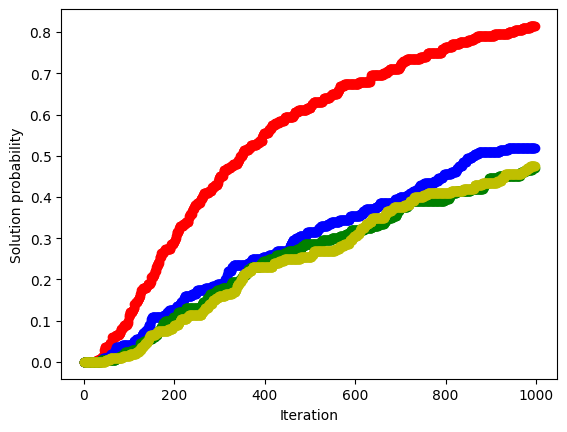

In [20]:
plt.plot(p_vs_t_g[0:-1],'or')
plt.plot(p_vs_t_skcseq[0:-1],'ob')
plt.plot(p_vs_t_mg1[0:-1],'og')
plt.plot(p_vs_t_mg2[0:-1],'oy')
plt.xlabel('Iteration')
plt.ylabel('Solution probability')

Text(0, 0.5, 'Number of violated clauses')

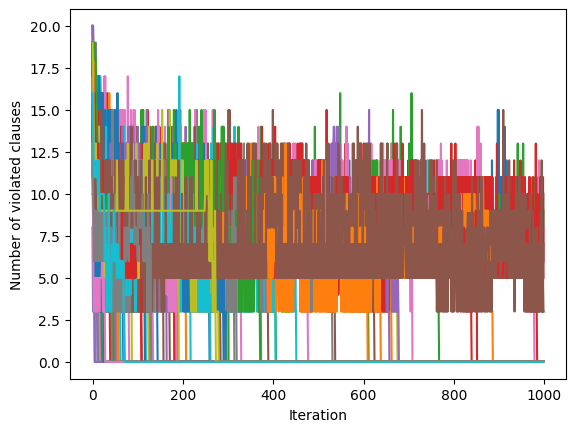

In [55]:
for run in violated_constr_mat:
    plt.plot(run)
plt.xlabel('Iteration')
plt.ylabel('Number of violated clauses')

### Example 2: specify number of experiments and noise value

In [59]:
module_path = os.path.abspath(os.path.join(""))
config = {'instance': module_path +'/data/uf20-91/uf20-01.cnf',
         'noise': 0.8}
params = {'max_runs': 250,  #number of of parallel runs
         'max_flips': 500} #number of flips in a single run

In [60]:
p_vs_t, violated_constr_mat, inputs = solver.solve(config = config,params = params)

Text(0, 0.5, 'Solution probability')

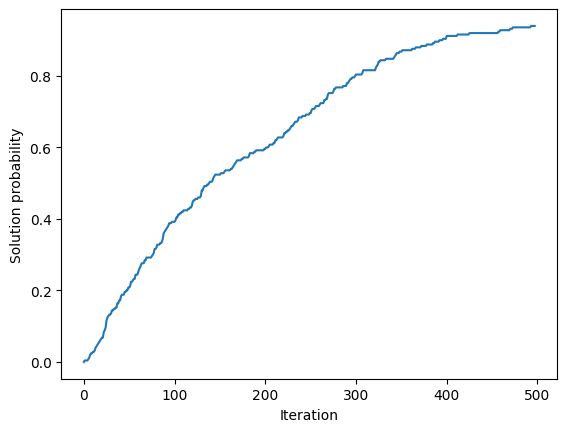

In [61]:
plt.plot(p_vs_t[0:-1])
plt.xlabel('Iteration')
plt.ylabel('Solution probability')